In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('911.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1  
3          AIRY ST & SWEDE ST  1  
4    CHERRYWOOD CT & DEAD END  1

In [7]:
df.describe()

lat           lng           zip        e
count  99492.000000  99492.000000  86637.000000  99492.0
mean      40.159526    -75.317464  19237.658298      1.0
std        0.094446      0.174826    345.344914      0.0
min       30.333596    -95.595595  17752.000000      1.0
25%       40.100423    -75.392104  19038.000000      1.0
50%       40.145223    -75.304667  19401.000000      1.0
75%       40.229008    -75.212513  19446.000000      1.0
max       41.167156    -74.995041  77316.000000      1.0

In [9]:
#  top five zip codes
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [12]:
# top five townships
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [14]:
# unique Title
df['title'].nunique()

110

In [15]:
df['dept'] = df['title'].apply(lambda t: t.split(':')[0])

In [17]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e  dept  
0      REINDEER CT & DEAD END  1   EMS  
1  BRIAR PATH & WHITEMARSH LN  1   EMS  
2                    HAWS AVE  1  Fire  
3          AIRY ST & SWEDE ST  1   EMS  
4    CHERRYWOOD CT & DEAD END  1   EMS

In [18]:
# most common reason based on new column

In [20]:
df['dept'].value_counts().head(1)

EMS    48877
Name: dept, dtype: int64

In [21]:
# seaborn countplot for 911 calls by reason

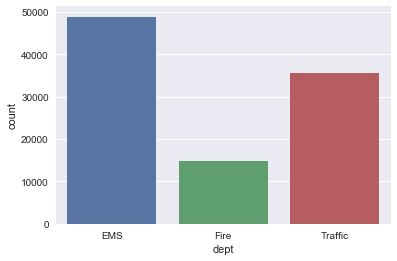

In [24]:

sns.countplot(x = df['dept'], data = df)

In [29]:
type(df['timeStamp'].iloc[0])

str

In [31]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [32]:
time = df['timeStamp'].iloc[0]


In [37]:
time.hour

17

In [38]:
time.month

12

In [39]:
time.dayofweek

3

In [40]:
df['hour'] = df['timeStamp'].apply(lambda x: x.hour)

In [44]:
df['month'] = df['timeStamp'].apply(lambda x: x.month)
df['day of week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [45]:
# map day of week to string day
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [47]:
df['day of week'] = df['day of week'].map(dmap)

In [48]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e  dept  hour  month day of week  
0      REINDEER CT & DEAD END  1   EMS    17     12         Thu  
1  BRIAR PATH & WHITEMARSH LN  1   EMS    17     12         Thu  
2                    HAWS AVE  1  Fire    17     12         Thu  
3          AIRY ST & SWEDE ST  1   EMS    17     12         Thu  
4    CHERRYWOOD CT & DEAD END  1   EMS    17     12         Thu

In [49]:
# seaborn countplot for day of week with hue = reason

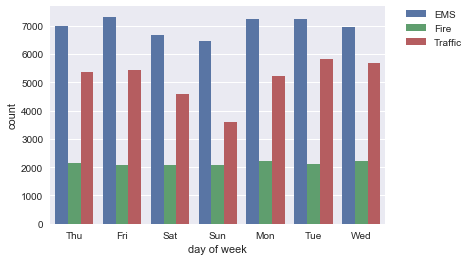

In [52]:
sns.countplot(x='day of week', hue = 'dept', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [55]:
bymonth= df.groupby('month').count()

In [57]:
bymonth

lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
month                                                                      
1      13205  13205  13205  11527  13205      13205  13203  13096  13205   
2      11467  11467  11467   9930  11467      11467  11465  11396  11467   
3      11101  11101  11101   9755  11101      11101  11092  11059  11101   
4      11326  11326  11326   9895  11326      11326  11323  11283  11326   
5      11423  11423  11423   9946  11423      11423  11420  11378  11423   
6      11786  11786  11786  10212  11786      11786  11777  11732  11786   
7      12137  12137  12137  10633  12137      12137  12133  12088  12137   
8       9078   9078   9078   7832   9078       9078   9073   9025   9078   
12      7969   7969   7969   6907   7969       7969   7963   7916   7969   

        dept   hour  day of week  
month                             
1      13205  13205        13205  
2      11467  11467        11467  
3      11101  11101        11101  
4      11326  11326        11326  
5      11423  11423        11423  
6      11786  11786        11786  
7      12137  12137        12137  
8       9078   9078         9078  
12      7969   7969         7969

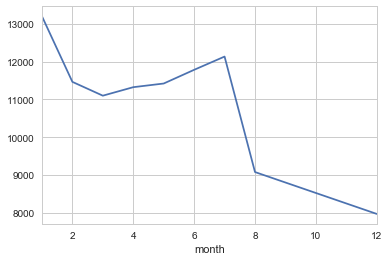

In [60]:
# count of calls per month
sns.set_style('whitegrid')
bymonth['lat'].plot()

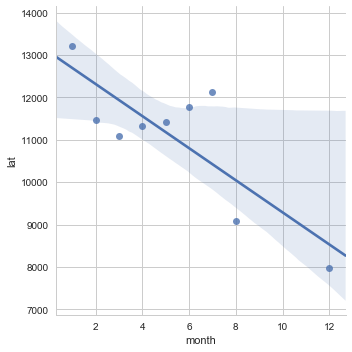

In [68]:
# create a linear fit on the number of calls per month
sns.lmplot(x='month', y = 'lat', data = bymonth.reset_index())
#sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [72]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

In [73]:
df['Date'].iloc[0]

datetime.date(2015, 12, 10)

In [74]:
#broupby date
byDate = df.groupby('Date').count()

In [76]:
byDate.head()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  dept  hour  \
Date                                                                            
2015-12-10  115  115   115  100    115        115  115   113  115   115   115   
2015-12-11  396  396   396  333    396        396  395   391  396   396   396   
2015-12-12  403  403   403  333    403        403  403   401  403   403   403   
2015-12-13  319  319   319  280    319        319  319   317  319   319   319   
2015-12-14  447  447   447  387    447        447  446   445  447   447   447   

            month  day of week  
Date                            
2015-12-10    115          115  
2015-12-11    396          396  
2015-12-12    403          403  
2015-12-13    319          319  
2015-12-14    447          447

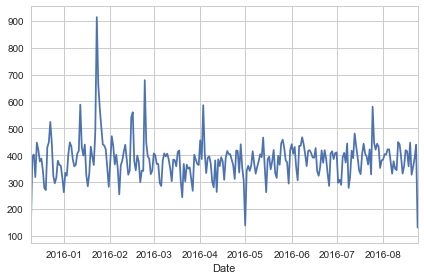

In [81]:
byDate['lat'].plot()
plt.tight_layout()

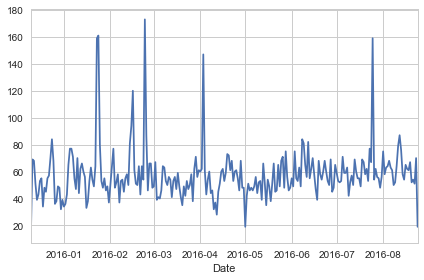

In [88]:
df[df['dept'] =='Fire'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

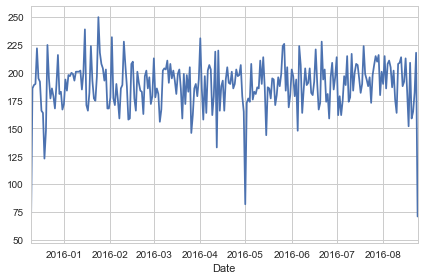

In [90]:
df[df['dept'] =='EMS'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

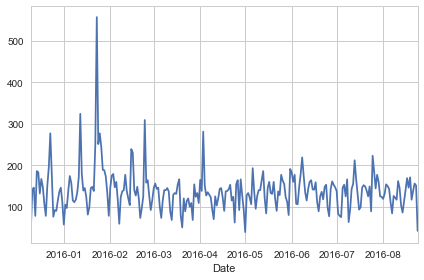

In [91]:
df[df['dept'] =='Traffic'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

In [98]:
byWeekHour = df.groupby(by=['day of week', 'hour']).count()['dept'].unstack()

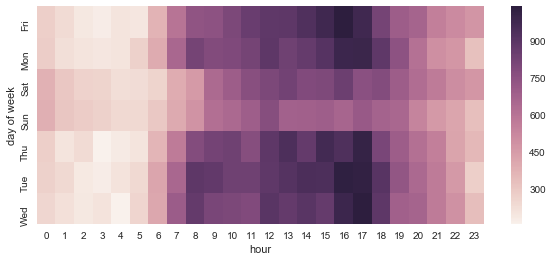

In [103]:
plt.figure(figsize=(10,4))
sns.heatmap(byWeekHour)

In [104]:
df.groupby(by=['day of week', 'hour']).count()['dept'].unstack()

day of week  hour
Fri          0        275
             1        235
             2        191
             3        175
             4        201
             5        194
             6        372
             7        598
             8        742
             9        752
             10       803
             11       859
             12       885
             13       890
             14       932
             15       980
             16      1039
             17       980
             18       820
             19       696
             20       667
             21       559
             22       514
             23       474
Mon          0        282
             1        221
             2        201
             3        194
             4        204
             5        267
                     ... 
Tue          18       905
             19       731
             20       647
             21       571
             22       462
             23       274
Wed          0      